<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/Abu_Dhabi_Housing_Authority_Demand_projection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error



This model will The management to make practical decisions concerning pipelines (of Lands, Houses), funding requirements, and staffing/contracting arrangements.

•	To forecast need and demand for lands and houses to be produced for Eligible Abu Dhabi citizens.
•	To estimate services like infrastructure projects that government should provide over time.


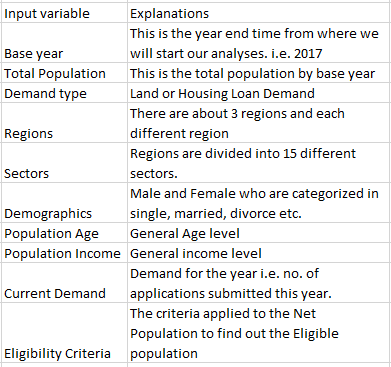

**Check out the data** 

Import the data!

In [ ]:
df= pd.read_csv('/content/sample_data/ProjectedPop.csv')
df.head()

,Age,Year,Gender,Region,Sector,Population,Eligible_for_house,Total_Demand_for_House,Eligible_For_Land,Total_Demand_for_Land,Final_Net_Population
0,22,2017,Male,Central,AAN,929.0,104.805516,0.0,312.496967,0.0,929.0
1,22,2017,Male,North,AAN,95.0,10.717464,0.0,31.956095,0.0,95.0
2,22,2017,Male,South,AAN,88.0,9.927756,0.0,29.601435,0.0,88.0
3,22,2017,Male,East,AAN,264.0,29.783268,0.0,88.804305,0.0,264.0
4,22,2017,Male,West,AAN,352.0,39.711024,0.0,118.405740,0.0,352.0







Data Description 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4312 non-null   int64  
 1   Year                    4312 non-null   int64  
 2   Gender                  4312 non-null   object 
 3   Region                  4312 non-null   object 
 4   Sector                  4312 non-null   object 
 5   Population              4312 non-null   float64
 6   Eligible_for_house      4312 non-null   float64
 7   Total_Demand_for_House  4312 non-null   float64
 8   Eligible_For_Land       4312 non-null   float64
 9   Total_Demand_for_Land   4312 non-null   float64
 10  Final_Net_Population    4312 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 370.7+ KB


In [ ]:
df.describe()

,Age,Year,Population,Eligible_for_house,Total_Demand_for_House,Eligible_For_Land,Total_Demand_for_Land,Final_Net_Population
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000
mean,46.701299,2018.500000,63.377870,4.889263,0.121067,22.826226,2.823186,59.857519
std,12.012281,1.118164,144.420547,13.773570,0.634278,59.995570,18.351768,137.121477
min,22.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,2017.750000,3.672508,0.243639,0.000000,0.375430,0.000000,3.504108
50%,47.000000,2018.500000,12.000000,1.043136,0.000000,3.155567,0.000000,11.178074
75%,57.000000,2019.250000,60.016784,4.309810,0.000000,13.069319,0.000000,57.610940
max,66.000000,2020.000000,1337.000000,168.837682,9.579390,613.730661,301.000000,1337.000000


**Split the data into house and land**

In [ ]:
dfLand = df[['Age','Year','Gender','Region','Sector','Population','Eligible_For_Land','Total_Demand_for_Land']]
dfLand.head()

,Age,Year,Gender,Region,Sector,Population,Eligible_For_Land,Total_Demand_for_Land
0,22,2017,Male,Central,AAN,929.0,312.496967,0.0
1,22,2017,Male,North,AAN,95.0,31.956095,0.0
2,22,2017,Male,South,AAN,88.0,29.601435,0.0
3,22,2017,Male,East,AAN,264.0,88.804305,0.0
4,22,2017,Male,West,AAN,352.0,118.405740,0.0


**EDA**


Over all Polulation of Male and Female

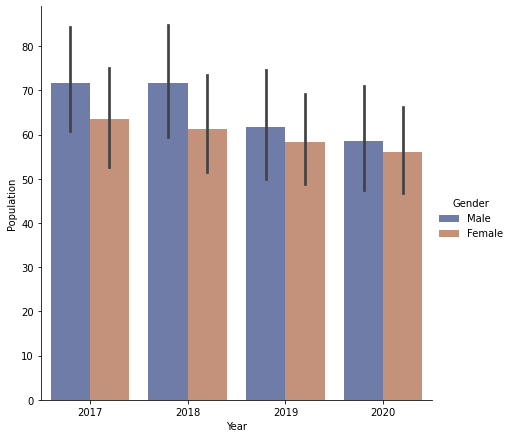

In [ ]:
#sns.barplot(x='Gender',y='Population',data=df)
sns.catplot(
    data=df, kind="bar",
    x="Year", y="Population", hue="Gender"
    , palette="dark", alpha=.6, height=6
)

population Eligible for house! 

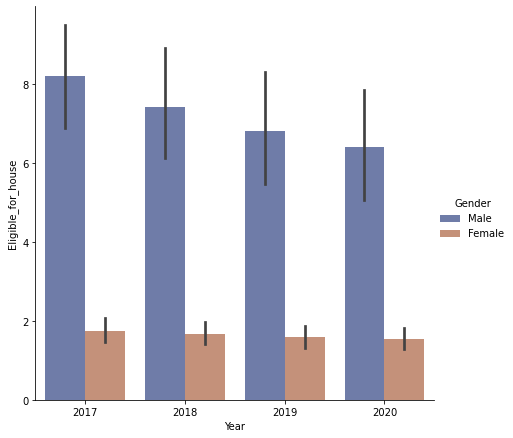

In [ ]:
#sns.barplot(x='Gender',y='Eligible_for_house',data=dfHouse)
sns.catplot(
    data=dfHouse, kind="bar",
    x="Year", y="Eligible_for_house", hue="Gender"
    , palette="dark", alpha=.6, height=6
)

population Eligible for Land!

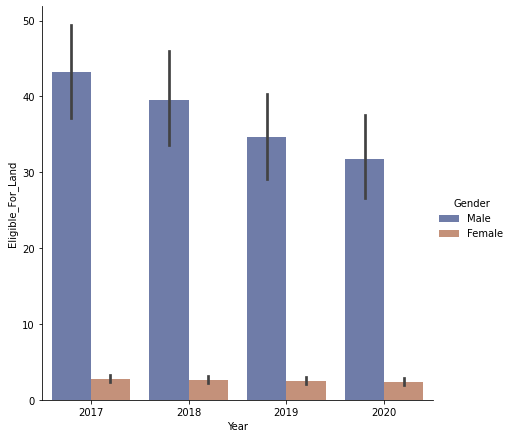

In [ ]:
#sns.barplot(x='Gender',y='Eligible_For_Land',data=dfLand)
sns.catplot(
    data=dfLand, kind="bar",
    x="Year", y="Eligible_For_Land", hue="Gender"
    ,palette="dark", alpha=.6, height=6
)

demand for land

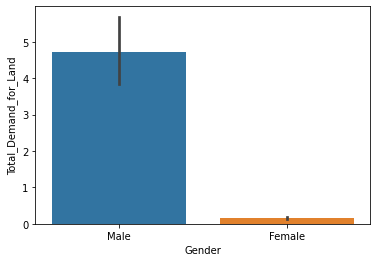

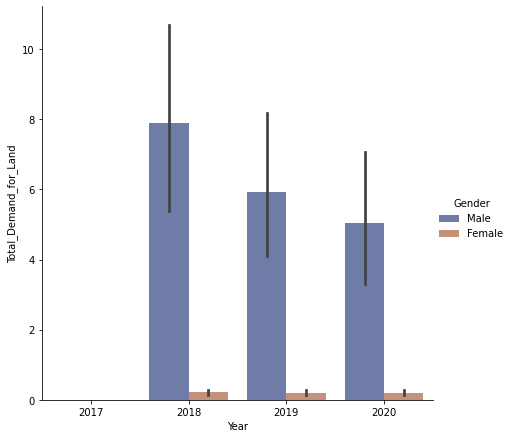

In [ ]:
sns.barplot(x='Gender',y='Total_Demand_for_Land',data=dfLand)
sns.catplot(
    data=dfLand, kind="bar",
    x="Year", y="Total_Demand_for_Land", hue="Gender"
    ,palette="dark", alpha=.6, height=6
)

Demand for house

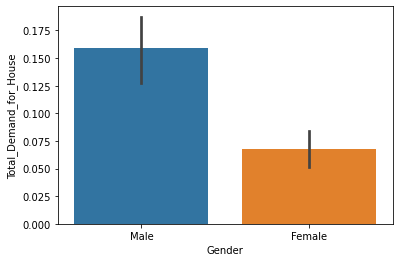

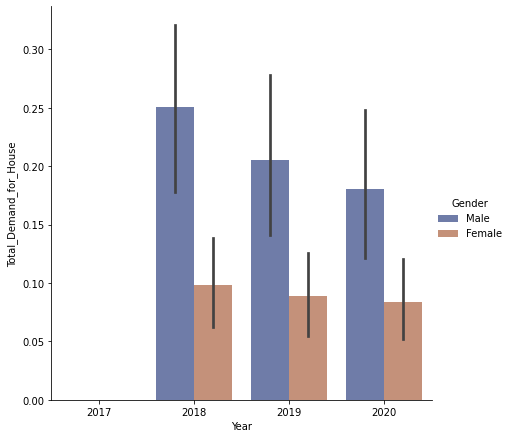

In [ ]:
sns.barplot(x='Gender',y='Total_Demand_for_House',data=dfHouse)
sns.catplot(
    data=dfHouse, kind="bar",
    x="Year", y="Total_Demand_for_House", hue="Gender"
    ,palette="dark", alpha=.6, height=6
)

Sector wise population

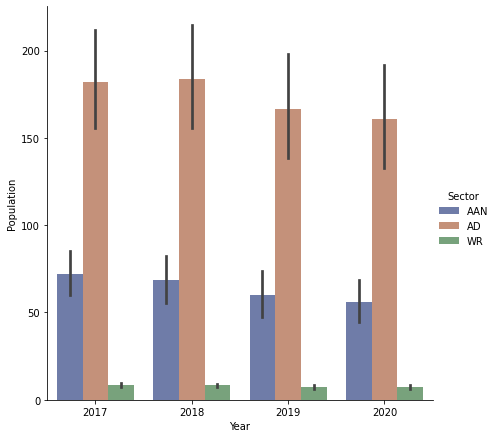

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x="Year", y="Population", hue="Sector"
    ,palette="dark", alpha=.6, height=6
)


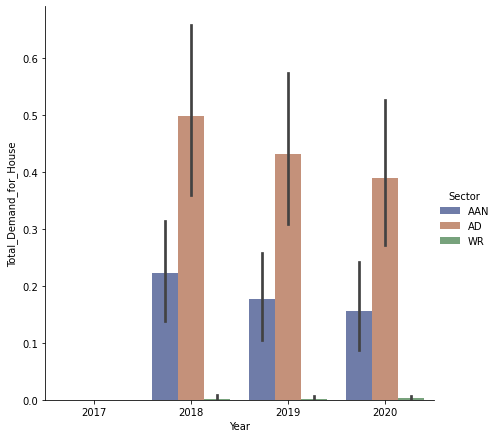

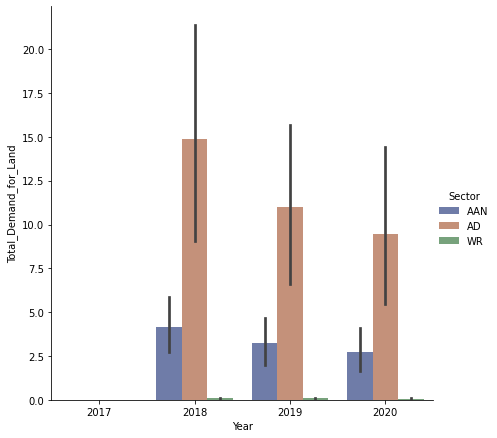

In [ ]:
sns.catplot(
    data=dfHouse, kind="bar",
    x="Year", y="Total_Demand_for_House", hue="Sector"
    ,palette="dark", alpha=.6, height=6
)
sns.catplot(
    data=dfLand, kind="bar",
    x="Year", y="Total_Demand_for_Land", hue="Sector"
    ,palette="dark", alpha=.6, height=6
)

Region wise population

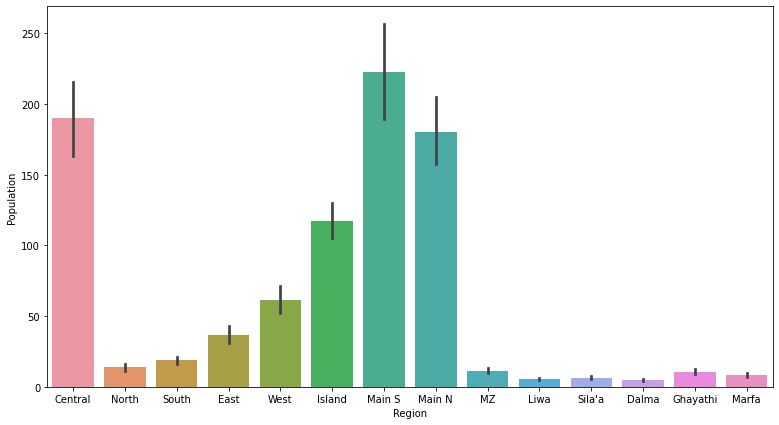

In [ ]:
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Region',y='Population',data=df,ax=ax)

 yearly population

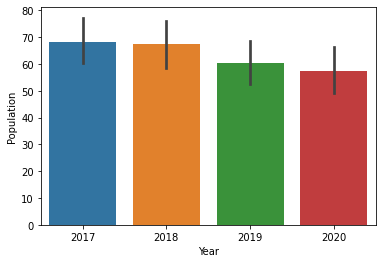

In [ ]:
sns.barplot(x='Year',y='Population',data=df)

                            Year  ...  Total_Demand_for_House
Year                    1.000000  ...                0.068695
Population             -0.030572  ...                0.423044
Eligible_for_house     -0.030676  ...                0.352582
Total_Demand_for_House  0.068695  ...                1.000000

[4 rows x 4 columns]


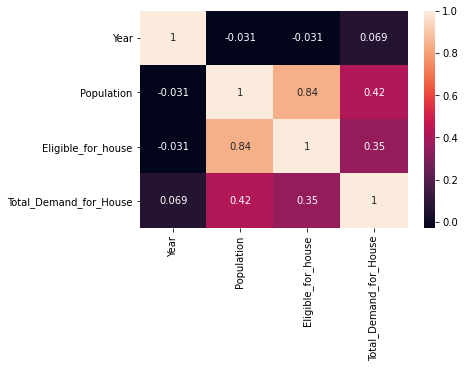

In [ ]:
A = dfHouse.iloc[:,np.r_ [1:3,5:8]].corr()
print(A)
sns.heatmap(A,annot=True);

Comparison between Numeric values of Land

                           Year  ...  Total_Demand_for_Land
Year                   1.000000  ...               0.048380
Population            -0.030572  ...               0.431981
Eligible_For_Land     -0.043618  ...               0.627994
Total_Demand_for_Land  0.048380  ...               1.000000

[4 rows x 4 columns]


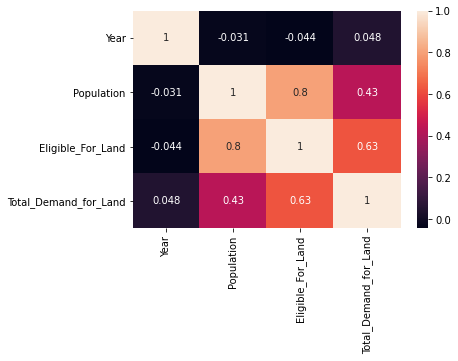

In [ ]:

B = dfLand.iloc[:,np.r_ [1:3,5:8]].corr()
print(B)
#f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(B,annot=True)

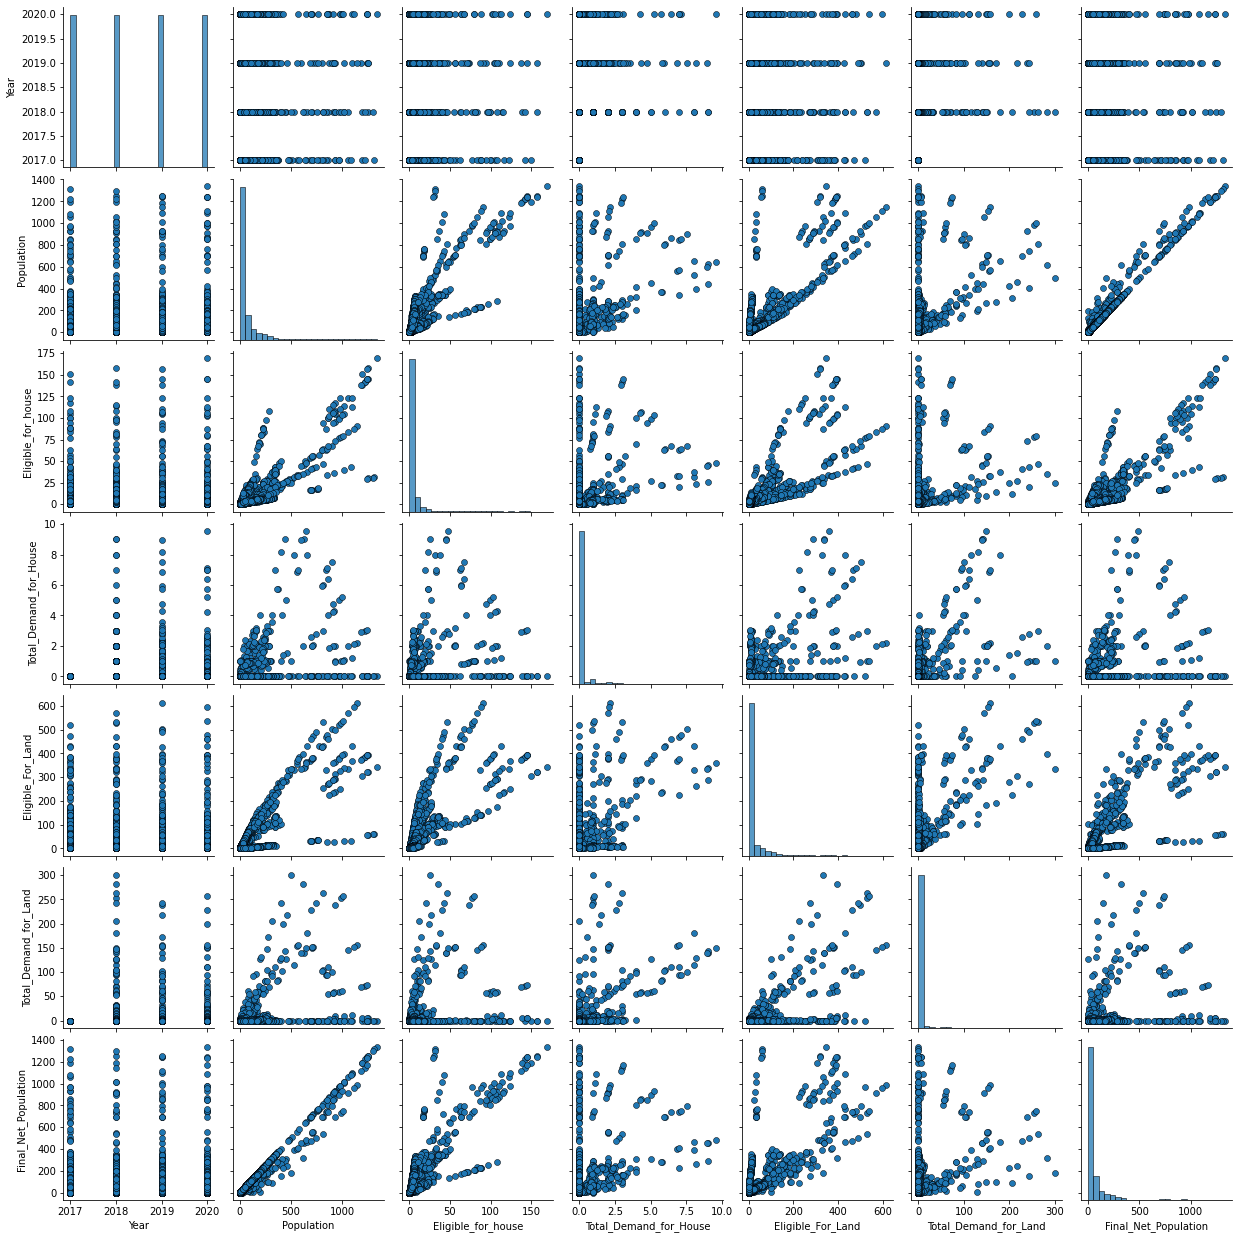

In [ ]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

In [ ]:
  Fields = ['Gender','Region','Sector']
  for each in Fields: 
    Field = pd.get_dummies(dfHouse[each],prefix=each, drop_first=False)
    dfHouse = dfHouse.join(Field)
dfHouse.head()

,Age,Year,Gender,Region,Sector,Population,Eligible_for_house,Total_Demand_for_House,Gender_Female,Gender_Male,Region_Central,Region_Dalma,Region_East,Region_Ghayathi,Region_Island,Region_Liwa,Region_MZ,Region_Main N,Region_Main S,Region_Marfa,Region_North,Region_Sila'a,Region_South,Region_West,Sector_AAN,Sector_AD,Sector_WR
0,22,2017,Male,Central,AAN,929.0,104.805516,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2017,Male,North,AAN,95.0,10.717464,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,22,2017,Male,South,AAN,88.0,9.927756,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,22,2017,Male,East,AAN,264.0,29.783268,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,22,2017,Male,West,AAN,352.0,39.711024,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
  Fields = ['Gender','Region','Sector']
  for each in Fields: 
    Field = pd.get_dummies(dfLand[each],prefix=each, drop_first=False)
    dfLand = dfLand.join(Field)
dfLand.head()

,Age,Year,Gender,Region,Sector,Population,Eligible_For_Land,Total_Demand_for_Land,Gender_Female,Gender_Male,Region_Central,Region_Dalma,Region_East,Region_Ghayathi,Region_Island,Region_Liwa,Region_MZ,Region_Main N,Region_Main S,Region_Marfa,Region_North,Region_Sila'a,Region_South,Region_West,Sector_AAN,Sector_AD,Sector_WR
0,22,2017,Male,Central,AAN,929.0,312.496967,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2017,Male,North,AAN,95.0,31.956095,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,22,2017,Male,South,AAN,88.0,29.601435,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,22,2017,Male,East,AAN,264.0,88.804305,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,22,2017,Male,West,AAN,352.0,118.405740,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


**Training a Linear Regression Model**

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Demand column. We will toss out the Address column because it only has text info that the linear regression model can't use.

Applying Linear Regression over Total_Demand_for_Land & Final_Net_Population 

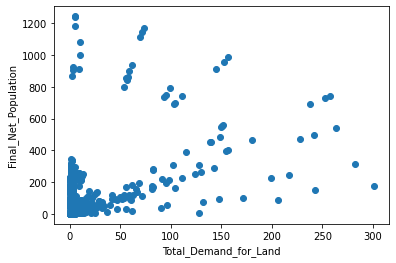

In [ ]:

#varX = df.Total_Demand_for_Land.to_numpy();
varX = df.query('Total_Demand_for_Land > 0').Total_Demand_for_Land.to_numpy();
varY = df.query('Total_Demand_for_Land > 0').Final_Net_Population.to_numpy();
plt.xlabel("Total_Demand_for_Land")
plt.ylabel("Final_Net_Population")
plt.scatter(varX,varY)

In [ ]:
DividedX = varX /1000;
DividedY = varY/1000;
m,c = np.random.random(), np.random.random()

In [ ]:
def learn(x,y,m,c,epoch):
  error = y- (m*x+c)
  x_error = (y- (m*x+c)) * x
  error = np.sum(error)/len(x)
  x_error = np.sum(x_error)/len(x)
  learning_rate = 0.01
  delta_m = learning_rate * x_error
  delta_c = (learning_rate * error)
  m += delta_m  
  c += delta_c
  return (m,c)

In [ ]:
m,c = learn(DividedX, DividedY, m,c,20000)
print ('Slope is ',m )
print ('Intercept is ', c)

Slope is  0.14796374069705037
Intercept is  0.5428029671873431


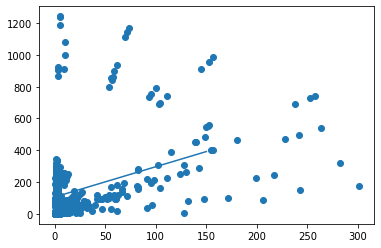

In [ ]:
model.fit(varX[:, np.newaxis], varX)

xfit = np.linspace(0,150,200)
yfit = model.predict(xfit[:, np.newaxis])
plt.xlabel("Total_Demand_for_Land")
plt.ylabel("Final_Net_Population")
plt.scatter(varX, varY)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9051600145806467
Model intercept: 106.29304822254126


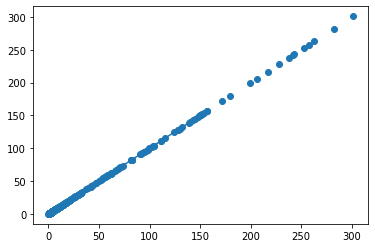

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

xfit = np.linspace(0,150,300)
poly_model.fit(varX[:, np.newaxis], varX)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.xlabel("Total_Demand_for_Land")
plt.ylabel("Final_Net_Population")
plt.scatter(varX, varX)
plt.plot(xfit, yfit);

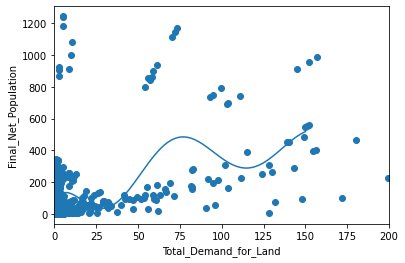

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(varX[:, np.newaxis], varY)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.xlabel("Total_Demand_for_Land")
plt.ylabel("Final_Net_Population")
plt.scatter(varX, varY)
plt.plot(xfit, yfit)
plt.xlim(0, 200);